In [ ]:
!pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 512 kB/s 


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing libraries
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import LabelEncoder
from skimage import color
import seaborn as sns
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import classification_report, confusion_matrix 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
import os
import cv2
from cv2 import dnn_superres 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from glob import glob
sr = dnn_superres.DnnSuperResImpl_create()
from glob import glob

In [ ]:
# Read dataset
Train=os.listdir("train")
Test=os.listdir("testing")
Valid=os.listdir("validation")


path_Train="train/"
path_Test="testingp/"
path_Valid="validation/"



# Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator=train_datagen.flow_from_directory(path_Train,
                                                 target_size=(64,64),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=64)

val_generator=val_datagen.flow_from_directory(path_Valid,
                                                 target_size=(64,64),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=64)

test_generator=test_datagen.flow_from_directory(path_Test,
                                                 target_size=(64,64),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=64)

Found 336 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 117 images belonging to 10 classes.


In [ ]:
x_test, y_test = next(test_generator)

# inception

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator1=train_datagen.flow_from_directory(path_Train,
                                                 target_size=(75,75),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=256)

val_generator1=val_datagen.flow_from_directory(path_Valid,
                                                 target_size=(75,75),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=256)

test_gemerator1=test_datagen.flow_from_directory(path_Test,
                                                 target_size=(75,75),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=256)

Found 336 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 117 images belonging to 10 classes.


In [ ]:
convlayer1 = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(75,75,3))

In [ ]:
for layer in convlayer1.layers:
    layer.trainable = False

In [ ]:
x2 = convlayer1.output
x2 = GlobalAveragePooling2D()(x2)
x2 = Dense(512, activation='relu')(x2)
x2 = Dropout(0.4)(x2)
x2 = Dense(256, activation='LeakyReLU')(x2)
x2 = Dropout(0.3)(x2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
pred_Inception = Dense(10, activation='softmax')(x2)
model_Inception = Model(inputs = convlayer1.input, outputs = pred_Inception)

model_Inception.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model_Inception1= model_Inception.fit(train_generator1,validation_data=val_generator1,
         epochs=100)

Epoch 1/100
2/2 [==============================] - 9s 3s/step - loss: 2.9039 - accuracy: 0.0923 - val_loss: 2.3508 - val_accuracy: 0.1400
Epoch 2/100
2/2 [==============================] - 1s 1s/step - loss: 2.8497 - accuracy: 0.0952 - val_loss: 2.2755 - val_accuracy: 0.1800
Epoch 3/100
2/2 [==============================] - 1s 1s/step - loss: 2.6212 - accuracy: 0.1131 - val_loss: 2.2268 - val_accuracy: 0.1800
Epoch 4/100
2/2 [==============================] - 1s 473ms/step - loss: 2.4751 - accuracy: 0.1280 - val_loss: 2.1942 - val_accuracy: 0.2200
Epoch 5/100
2/2 [==============================] - 1s 498ms/step - loss: 2.5177 - accuracy: 0.1071 - val_loss: 2.1714 - val_accuracy: 0.2400
Epoch 6/100
2/2 [==============================] - 1s 478ms/step - loss: 2.5065 - accuracy: 0.1042 - val_loss: 2.1514 - val_accuracy: 0.2600
Epoch 7/100
2/2 [==============================] - 1s 1s/step - loss: 2.3529 - accuracy: 0.1726 - val_loss: 2.1297 - val_accuracy: 0.2400
Epoch 8/100
2/2 [========

In [ ]:
model_Inception.evaluate(test_gemerator1)

1/1 [==============================] - 1s 754ms/step - loss: 1.9168 - accuracy: 0.3846


[1.9168051481246948, 0.38461539149284363]

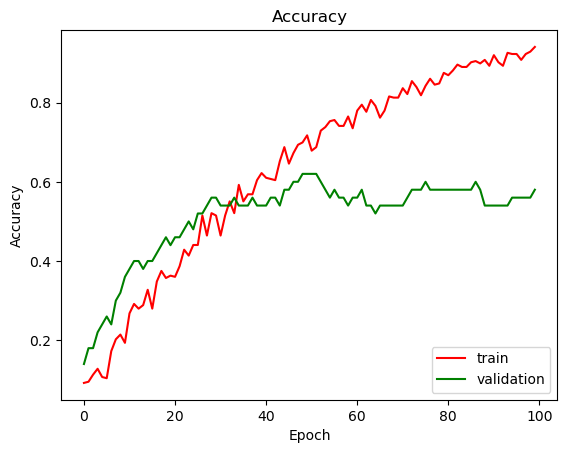

In [ ]:
plt.plot(model_Inception1.history['accuracy'],c='red')
plt.plot(model_Inception1.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

# RseNet

In [ ]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(64,64,3),weights='imagenet',include_top=False)


In [ ]:
x1 = convlayer.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(128, activation='LeakyReLU')(x1)
x1 = Dropout(0.3)(x1)
x1 = Dense(64, activation='LeakyReLU')(x1)
x1 = Dropout(0.1)(x1)
x1 = Dense(32, activation='LeakyReLU')(x1)

pred_ResNet = Dense(10, activation='softmax')(x1)


In [ ]:
model_ResNet = Model(inputs = convlayer.input, outputs = pred_ResNet)

In [ ]:
model_ResNet.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_ResNet1=model_ResNet.fit(train_generator,validation_data=val_generator,epochs=25)

Epoch 1/25
6/6 [==============================] - 45s 5s/step - loss: 2.6895 - accuracy: 0.0952 - val_loss: 2.5546 - val_accuracy: 0.1400
Epoch 2/25
6/6 [==============================] - 29s 5s/step - loss: 2.1931 - accuracy: 0.2143 - val_loss: 2.4101 - val_accuracy: 0.1200
Epoch 3/25
6/6 [==============================] - 29s 5s/step - loss: 1.9767 - accuracy: 0.2917 - val_loss: 2.3501 - val_accuracy: 0.1600
Epoch 4/25
6/6 [==============================] - 29s 5s/step - loss: 1.7174 - accuracy: 0.4345 - val_loss: 2.2639 - val_accuracy: 0.2000
Epoch 5/25
6/6 [==============================] - 27s 4s/step - loss: 1.5313 - accuracy: 0.5149 - val_loss: 2.1905 - val_accuracy: 0.2400
Epoch 6/25
6/6 [==============================] - 30s 5s/step - loss: 1.4146 - accuracy: 0.6220 - val_loss: 2.1445 - val_accuracy: 0.2600
Epoch 7/25
6/6 [==============================] - 29s 5s/step - loss: 1.2433 - accuracy: 0.6637 - val_loss: 2.0637 - val_accuracy: 0.2200
Epoch 8/25
6/6 [==================

In [ ]:
model_ResNet.evaluate(test_generator)

2/2 [==============================] - 2s 1s/step - loss: 2.3271 - accuracy: 0.3077


[2.327132225036621, 0.3076923191547394]

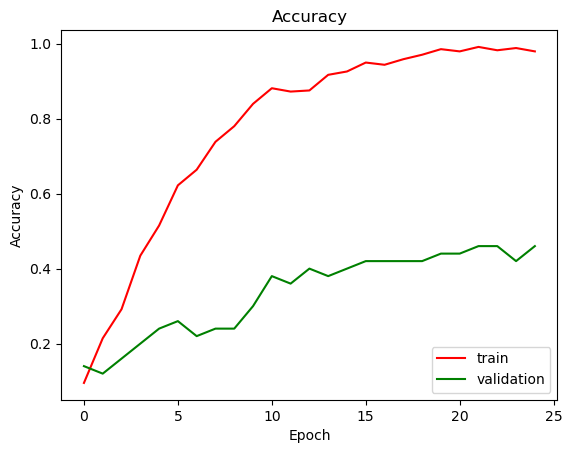

In [ ]:
plt.plot(model_ResNet1.history['accuracy'],c='red')
plt.plot(model_ResNet1.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

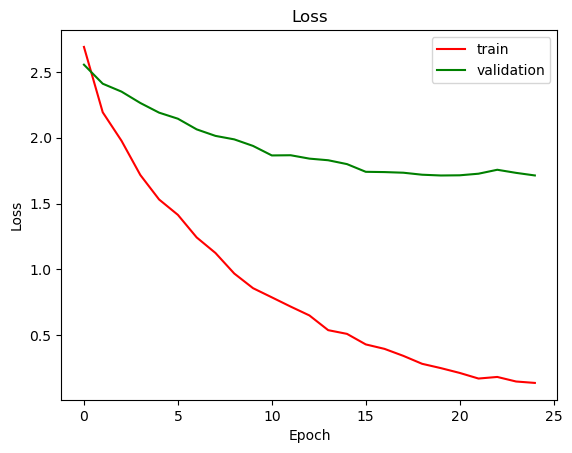

In [ ]:
plt.plot(model_ResNet1.history['loss'],c='red')
plt.plot(model_ResNet1.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

2/2 [==============================] - 3s 654ms/step
              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         8
         1.0       0.50      0.17      0.25         6
         2.0       0.33      0.20      0.25         5
         3.0       0.22      0.80      0.35         5
         4.0       0.33      0.14      0.20         7
         5.0       0.25      0.33      0.29         6
         6.0       0.33      0.67      0.44         6
         7.0       0.33      0.29      0.31         7
         8.0       0.75      0.43      0.55         7
         9.0       0.75      0.43      0.55         7

    accuracy                           0.36        64
   macro avg       0.43      0.37      0.35        64
weighted avg       0.44      0.36      0.36        64



<AxesSubplot:>

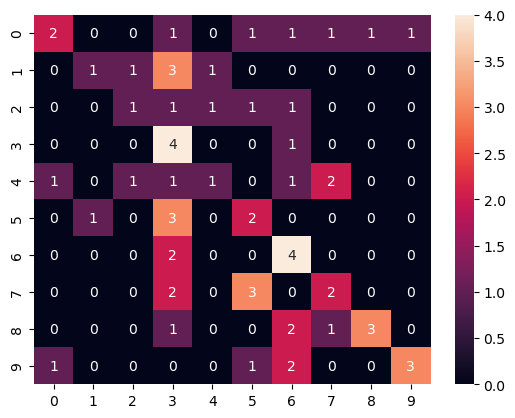

In [ ]:
y_test_prob = model_ResNet.predict(x_test)
ypredict_ResNet = y_test_prob.argmax(axis=-1)
print(classification_report(y_test,ypredict_ResNet))
sns.heatmap(confusion_matrix(y_test, ypredict_ResNet) ,annot=True)

# MobileNet - our champion for the basic model

In [ ]:
convlayer2 = MobileNet(weights = 'imagenet', include_top = False, input_shape=(64,64,3))

In [ ]:
x3 = convlayer2.output
x3 = GlobalAveragePooling2D()(x3)
x3 = Dense(512, activation='relu')(x3)
x3 = Dropout(0.2)(x3)
x3 = Dense(256, activation='relu')(x3)
x3 = Dropout(0.2)(x3)
pred_MobileNet = Dense(10, activation='softmax')(x3)
model_MobileNet = Model(inputs = convlayer2.input, outputs = pred_MobileNet)

In [ ]:
model_MobileNet.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_MobileNet1= model_MobileNet.fit(train_generator,validation_data=val_generator,epochs=50)

Epoch 1/50
6/6 [==============================] - 7s 596ms/step - loss: 3.3397 - accuracy: 0.1220 - val_loss: 2.4131 - val_accuracy: 0.1800
Epoch 2/50
6/6 [==============================] - 3s 456ms/step - loss: 2.3102 - accuracy: 0.2381 - val_loss: 2.1817 - val_accuracy: 0.2400
Epoch 3/50
6/6 [==============================] - 3s 458ms/step - loss: 1.7124 - accuracy: 0.3988 - val_loss: 2.0850 - val_accuracy: 0.3000
Epoch 4/50
6/6 [==============================] - 3s 455ms/step - loss: 1.3537 - accuracy: 0.5655 - val_loss: 1.9721 - val_accuracy: 0.3200
Epoch 5/50
6/6 [==============================] - 3s 458ms/step - loss: 1.0729 - accuracy: 0.6815 - val_loss: 1.8701 - val_accuracy: 0.3600
Epoch 6/50
6/6 [==============================] - 3s 464ms/step - loss: 0.8504 - accuracy: 0.7589 - val_loss: 1.8060 - val_accuracy: 0.3400
Epoch 7/50
6/6 [==============================] - 3s 458ms/step - loss: 0.7516 - accuracy: 0.8125 - val_loss: 1.7513 - val_accuracy: 0.3600
Epoch 8/50
6/6 [====

In [ ]:
model_MobileNet.evaluate(test_generator)

2/2 [==============================] - 1s 355ms/step - loss: 1.6760 - accuracy: 0.4530


[1.6760454177856445, 0.45299145579338074]

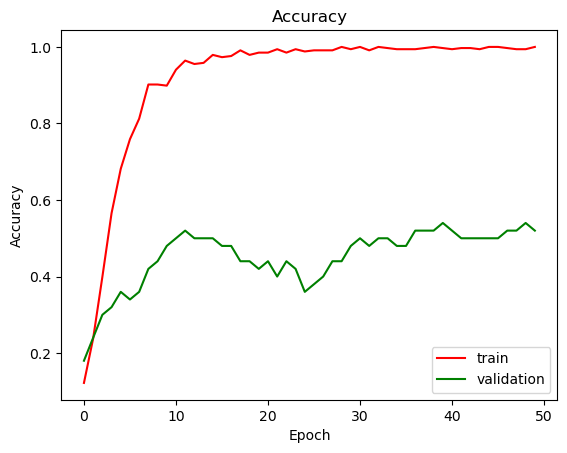

In [ ]:
plt.plot(model_MobileNet1.history['accuracy'],c='red')
plt.plot(model_MobileNet1.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

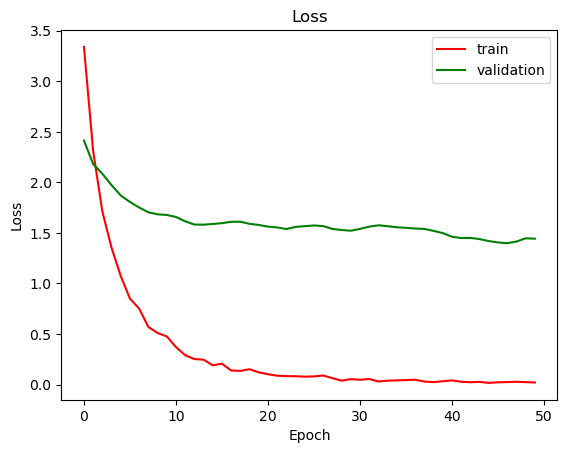

In [ ]:
plt.plot(model_MobileNet1.history['loss'],c='red')
plt.plot(model_MobileNet1.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [ ]:
y_test_prob = model_MobileNet.predict(x_test)
ypredict_test = y_test_prob.argmax(axis=-1)


2/2 [==============================] - 1s 67ms/step


In [ ]:
print(classification_report(y_test,ypredict_test))

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77         8
         1.0       0.50      0.50      0.50         6
         2.0       0.14      0.20      0.17         5
         3.0       0.50      0.60      0.55         5
         4.0       0.29      0.29      0.29         7
         5.0       0.40      0.33      0.36         6
         6.0       0.56      0.83      0.67         6
         7.0       0.50      0.29      0.36         7
         8.0       0.60      0.43      0.50         7
         9.0       0.50      0.71      0.59         7

    accuracy                           0.48        64
   macro avg       0.50      0.48      0.47        64
weighted avg       0.52      0.48      0.49        64



<AxesSubplot:>

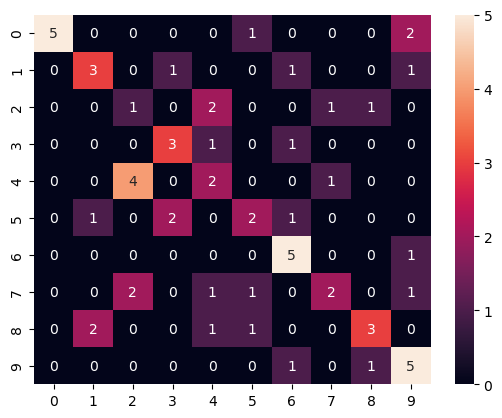

In [ ]:
sns.heatmap(confusion_matrix(y_test, ypredict_test) ,annot=True)

# **Super Resolution**

In [ ]:
# Read dataset
Train=os.listdir("train")
Test=os.listdir("testing")
Valid=os.listdir("validation")


path_Train="SR/train/"
path_Test="SR/testing/"
path_Valid="SR/validation/"

image_size=64
x_train,x_valid,x_test=[],[],[]
y_train,y_valid,y_test=[],[],[]

for i in Train:
    Tr_path=path_Train+str(i)
    file=[i for i in os.listdir(Tr_path)]
    for g in file:
        img = cv2.imread(Tr_path+'/'+g)
        im_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        x_train.append(im_bgr)
        y_train.append(i)       

In [ ]:
for i in Test:
    Tes_path=path_Test+str(i)
    file=[i for i in os.listdir(Tes_path)]
    for g in file:
        img = cv2.imread(Tes_path+'/'+g)
        im_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        x_test.append(im_bgr)
        y_test.append(i) 

In [ ]:
for i in Valid:
    val_path=path_Valid+str(i)
    file=[i for i in os.listdir(val_path)]
    for g in file:
        img = cv2.imread(val_path+'/'+g)
        im_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        x_valid.append(im_bgr)
        y_valid.append(i) 

In [ ]:
np.array(x_valid).shape

(50, 64, 64, 3)

In [ ]:
np.unique(y_train)

array(['blusher', 'brushes', 'creams', 'eyelinear', 'foundation',
       'lip gloss', 'mascara', 'nail polish', 'rouge', 'sponge'],
      dtype='<U11')

In [ ]:
# convert y to label_encoder
y=y_train
print(len(y))
y_labelencoder= LabelEncoder()
y=y_labelencoder.fit_transform(y)
y

336


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,

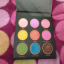

In [ ]:
from PIL import Image
display(Image.fromarray(x_train[0]))

In [ ]:
np.array(y_train)[1]

'blusher'

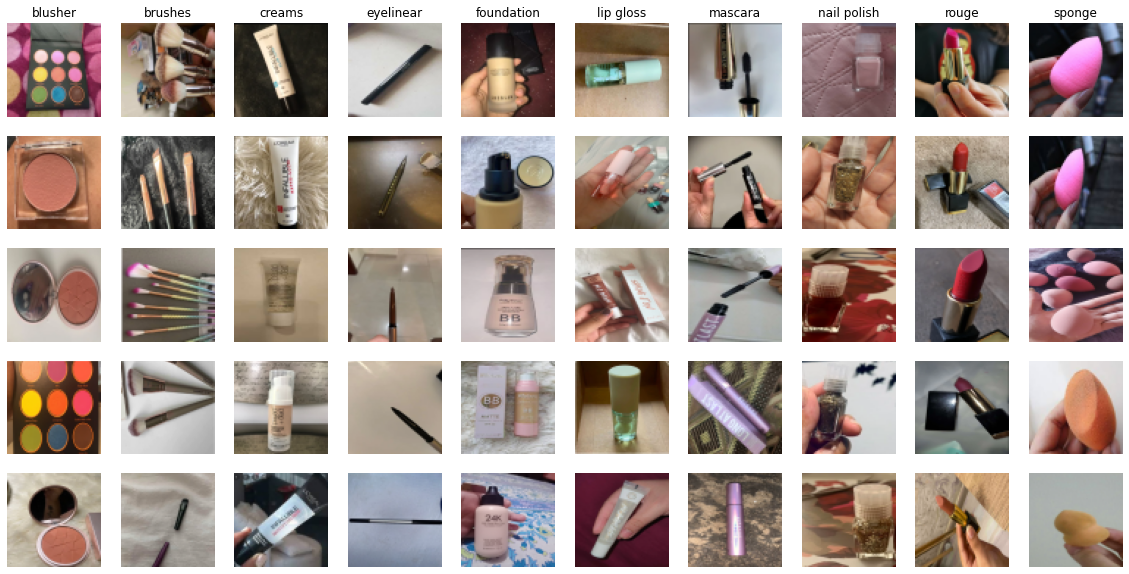

In [ ]:
# Visualize five samples of each class
# using the variable axs for multiple Axes
labels = ['blusher', 'brushes', 'creams', 'eyelinear', 'foundation','lip gloss', 'mascara', 'nail polish', 'rouge', 'sponge']
fig, axs = plt.subplots(5,10, figsize=(20,10))

for i in range(10):
  row = 0
  list_class = np.where(y==i)[0][:5]
  for j in list_class:
    axs[row][i].imshow(Image.fromarray(x_train[j]))
    axs[row][i].axis("off")
    axs[0][i].set_title(labels[i])

    row+=1

In [ ]:
Gray_Image=[]
for i in x_train:
#     gray_scale_imgs=color.rgb2gray(i)
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    Gray_Image.append(gray)


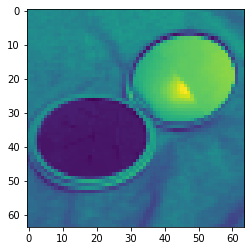

In [ ]:
plt.imshow(np.array(Gray_Image[8]))

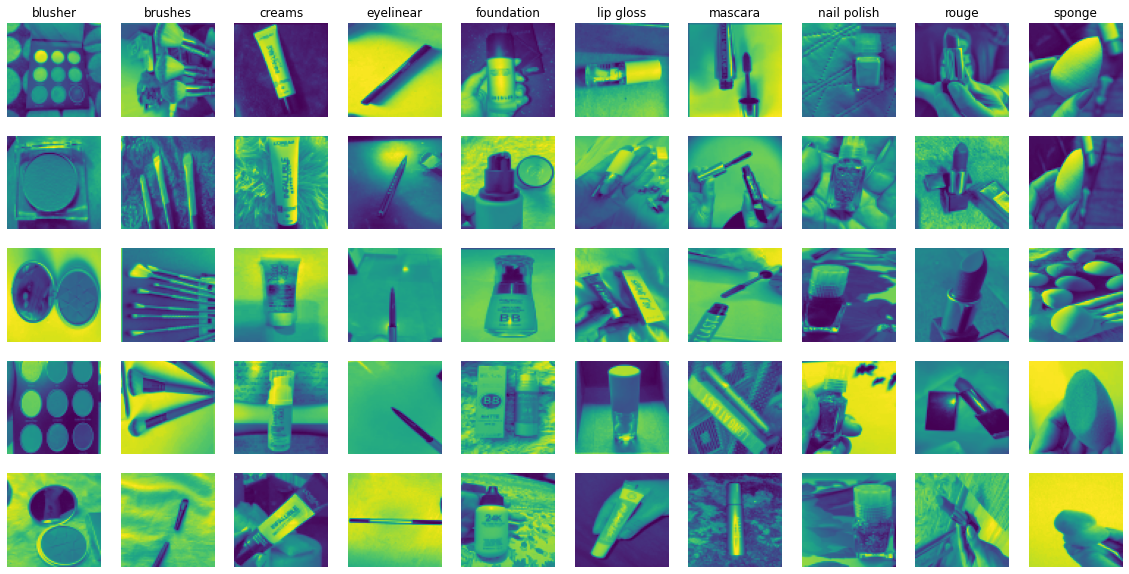

In [ ]:
labels = ['blusher', 'brushes', 'creams', 'eyelinear', 'foundation','lip gloss', 'mascara', 'nail polish', 'rouge', 'sponge']
fig, axs = plt.subplots(5,10, figsize=(20,10))

for i in range(10):
  row = 0
  list_class = np.where(y==i)[0][:5]
  for j in list_class:
    axs[row][i].imshow(np.array(Gray_Image[j]))
    axs[row][i].axis("off")
    axs[0][i].set_title(labels[i])

    row+=1

**Histogram of Oriented Gradients**

In [ ]:

from skimage.feature import hog

def ApplyHog(image):
  feature_Vector = hog(image, orientations=9, pixels_per_cell=[7,7],
              cells_per_block=[2,2],
            visualize=False, multichannel=False, block_norm="L2")
  return feature_Vector

X_HOG_Features = np.array([ApplyHog(img) for img in Gray_Image])

## **EDSR**

In [ ]:
# Read the desired model
path = "EDSR_x4.pb"
sr.readModel(path)

# # Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 3)


In [ ]:
for subdir, dirs, files in os.walk(rootdir):
    for file in dirs:
        print(os.path.join(subdir, file).replace(os.path.sep, '/'))

validation/blusher
validation/brushes
validation/creams
validation/eyelinear
validation/foundation
validation/lip gloss
validation/mascara
validation/nail polish
validation/rouge
validation/sponge


In [ ]:
image_list = []
rootdir = 'validation'

i = 0
for im in glob.iglob('validation/creams/*'):
    i+=1
    im=Image.open(im)
    numpyim = asarray(im)
    result = sr.upsample(numpyim)
    im_bgr = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
    image_list.append(im_bgr)
    cv2.imwrite("newpics/{:}.png".format(i), im_bgr)

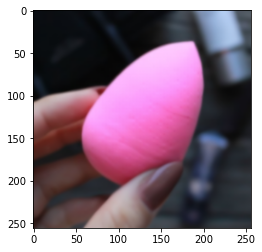

In [ ]:
# Read dataset
Train=os.listdir("train")
Test=os.listdir("testing")
Valid=os.listdir("validation")


path_Train="newpics/train/"
path_Test="newpics/testing/"
path_Valid="newpics/validation/"

image_size=64
x_train_sr,x_valid_sr,x_test_sr=[],[],[]
y_train_sr,y_valid_sr,y_test_sr=[],[],[]

for i in Train:
    Tr_path=path_Train+str(i)
    file=[i for i in os.listdir(Tr_path)]
    for g in file:
        img = cv2.imread(Tr_path+'/'+g)
        im_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        x_train_sr.append(im_bgr)
        y_train_sr.append(i)       
        
        
for i in Test:
    Tes_path=path_Test+str(i)
    file=[i for i in os.listdir(Tes_path)]
    for g in file:
        img = cv2.imread(Tes_path+'/'+g)
        im_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        x_test_sr.append(im_bgr)
        y_test_sr.append(i) 
        

for i in Valid:
    val_path=path_Valid+str(i)
    file=[i for i in os.listdir(val_path)]
    for g in file:
        img = cv2.imread(val_path+'/'+g)
        im_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        x_valid_sr.append(im_bgr)
        y_valid_sr.append(i)         plt.imshow(image_list[0])

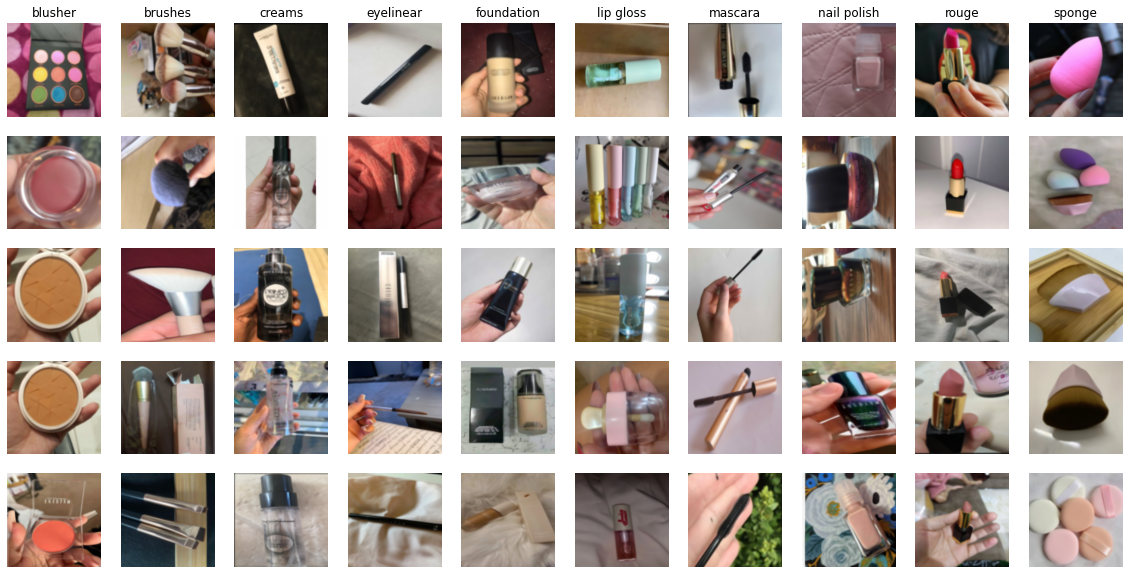

In [ ]:
# Visualize five samples of each class
# using the variable axs for multiple Axes
labels = ['blusher', 'brushes', 'creams', 'eyelinear', 'foundation','lip gloss', 'mascara', 'nail polish', 'rouge', 'sponge']
fig, axs = plt.subplots(5,10, figsize=(20,10))

for i in range(10):
  row = 0
  list_class = np.where(y==i)[0][:5]
  for j in list_class:
    axs[row][i].imshow(Image.fromarray(x_train_sr[j]))
    axs[row][i].axis("off")
    axs[0][i].set_title(labels[i])

    row+=1

In [ ]:
import tensorflow as tf

batch_size = 28
img_height = 224
img_width = 224

train_sr = tf.keras.preprocessing.image_dataset_from_directory(
    'newpics/train' ,
    shuffle=True,
    color_mode='rgb',
    image_size=(img_height, img_width),
    batch_size=batch_size,seed=42)

test_sr = tf.keras.preprocessing.image_dataset_from_directory(
    'newpics/testing' ,
    shuffle=True,
    color_mode='rgb',
    image_size=(img_height, img_width),
    batch_size=batch_size,seed=42)


valid_sr = tf.keras.preprocessing.image_dataset_from_directory(
    'newpics/validation' ,
    shuffle=True,
    color_mode='rgb',
    image_size=(img_height, img_width),
    batch_size=batch_size,seed=42)

Found 336 files belonging to 10 classes.
Found 108 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


## **MobilNet**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator=train_datagen.flow_from_directory(path_Train,
                                                 target_size=(64,64),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=64)

val_generator=val_datagen.flow_from_directory(path_Valid,
                                                 target_size=(64,64),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=64)

test_gemerator=test_datagen.flow_from_directory(path_Test,
                                                 target_size=(64,64),
                                                 color_mode='gray',
                                                 class_mode='sparse',batch_size=64)

Found 336 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 108 images belonging to 10 classes.


In [ ]:
convlayer2 = MobileNet(weights = 'imagenet', include_top = False, input_shape=(64,64,3))

In [ ]:
x3 = convlayer2.output
x3 = GlobalAveragePooling2D()(x3)
# x3 = Dense(256, activation='relu',kernel_regularizer='l2')(x3)
# x3 = Dropout(0.5)(x3)
x3 = Dense(64, activation='relu',kernel_regularizer='l2')(x3)
x3 = Dropout(0.5)(x3)
x3 = Dense(32, activation='relu')(x3)
x3 = Dropout(0.5)(x3)
pred_MobileNet1 = Dense(10, activation='softmax')(x3)
model_MobileNet1 = Model(inputs = convlayer2.input, outputs = pred_MobileNet1)

In [ ]:
model_MobileNet1.compile(Adam(lr=.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_MobileNet11= model_MobileNet1.fit(train_generator,validation_data=val_generator,epochs=30)

Epoch 1/30
6/6 [==============================] - 23s 2s/step - loss: 4.5629 - accuracy: 0.1280 - val_loss: 3.3913 - val_accuracy: 0.1600
Epoch 2/30
6/6 [==============================] - 6s 1s/step - loss: 3.9558 - accuracy: 0.1667 - val_loss: 3.5302 - val_accuracy: 0.0800
Epoch 3/30
6/6 [==============================] - 7s 1s/step - loss: 3.6964 - accuracy: 0.1726 - val_loss: 3.5187 - val_accuracy: 0.0800
Epoch 4/30
6/6 [==============================] - 6s 988ms/step - loss: 3.4878 - accuracy: 0.2054 - val_loss: 3.3512 - val_accuracy: 0.2000
Epoch 5/30
6/6 [==============================] - 6s 908ms/step - loss: 3.4008 - accuracy: 0.2202 - val_loss: 3.2964 - val_accuracy: 0.2000
Epoch 6/30
6/6 [==============================] - 6s 928ms/step - loss: 3.2577 - accuracy: 0.2470 - val_loss: 3.2536 - val_accuracy: 0.2200
Epoch 7/30
6/6 [==============================] - 6s 926ms/step - loss: 3.2299 - accuracy: 0.2798 - val_loss: 3.2032 - val_accuracy: 0.2600
Epoch 8/30
6/6 [============

In [ ]:
model_MobileNet1.evaluate(test_gemerator)

2/2 [==============================] - 2s 754ms/step - loss: 2.4516 - accuracy: 0.5370


[2.4516143798828125, 0.5370370149612427]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 

x_test, y_test = next(test_gemerator)
y_test_prob = model_MobileNet.predict(x_test)
ypredict_test = y_test_prob.argmax(axis=-1)
print(classification_report(y_test,ypredict_test))

2/2 [==============================] - 2s 42ms/step
              precision    recall  f1-score   support

         0.0       0.60      0.50      0.55         6
         1.0       0.20      0.17      0.18         6
         2.0       0.00      0.00      0.00         2
         3.0       0.50      0.50      0.50         4
         4.0       0.75      0.43      0.55         7
         5.0       0.33      0.17      0.22         6
         6.0       0.20      0.33      0.25         3
         7.0       0.00      0.00      0.00         2
         8.0       0.21      0.75      0.33         4
         9.0       0.33      0.25      0.29         4

    accuracy                           0.34        44
   macro avg       0.31      0.31      0.29        44
weighted avg       0.38      0.34      0.34        44



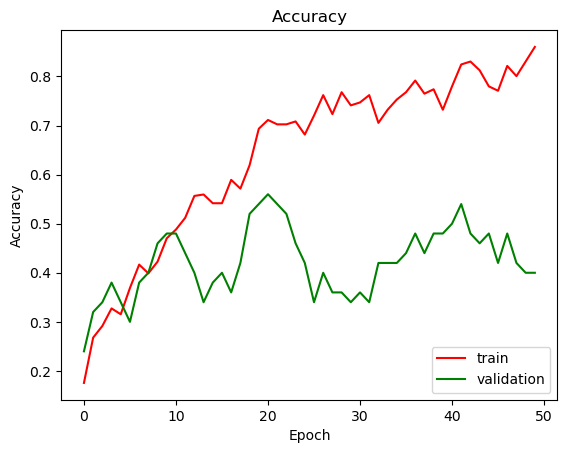

In [ ]:
plt.plot(model_MobileNet11.history['accuracy'],c='red')
plt.plot(model_MobileNet11.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

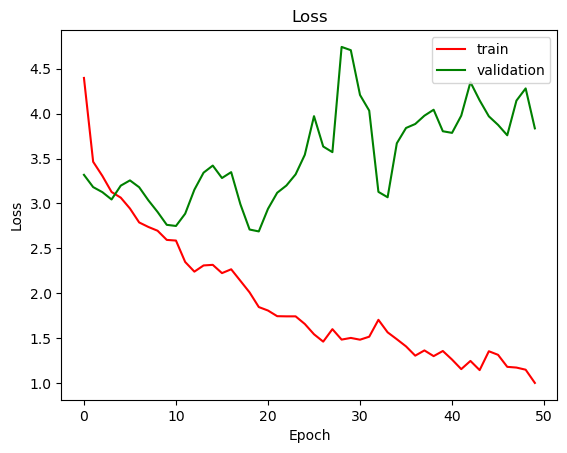

In [ ]:
plt.plot(model_MobileNet11.history['loss'],c='red')
plt.plot(model_MobileNet11.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

## **ResNet**

In [ ]:
from keras.applications import ResNet101V2
convlayer=ResNet101V2(input_shape=(64,64,3),weights='imagenet',include_top=False)


In [ ]:
x1 = convlayer.output
x1 = GlobalAveragePooling2D()(x1)
x1 = BatchNormalization()(x1)
x1 = Dense(256, activation='LeakyReLU')(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(128, activation='LeakyReLU')(x1)
x1 = Dropout(0.2)(x1)
pred_ResNet = Dense(10, activation='softmax')(x1)


In [ ]:
model_ResNet = Model(inputs = convlayer.input, outputs = pred_ResNet)

In [ ]:
model_ResNet.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_ResNet1=model_ResNet.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
6/6 [==============================] - 64s 4s/step - loss: 2.9307 - accuracy: 0.1369 - val_loss: 2.7032 - val_accuracy: 0.1200
Epoch 2/20
6/6 [==============================] - 35s 6s/step - loss: 1.8772 - accuracy: 0.3571 - val_loss: 2.6243 - val_accuracy: 0.1800
Epoch 3/20
6/6 [==============================] - 41s 7s/step - loss: 1.1933 - accuracy: 0.6399 - val_loss: 2.4987 - val_accuracy: 0.1600
Epoch 4/20
6/6 [==============================] - 43s 7s/step - loss: 0.8808 - accuracy: 0.7560 - val_loss: 2.4176 - val_accuracy: 0.2000
Epoch 5/20
6/6 [==============================] - 40s 6s/step - loss: 0.6250 - accuracy: 0.8661 - val_loss: 2.3518 - val_accuracy: 0.2200
Epoch 6/20
6/6 [==============================] - 41s 7s/step - loss: 0.4666 - accuracy: 0.9107 - val_loss: 2.2964 - val_accuracy: 0.2600
Epoch 7/20
6/6 [==============================] - 41s 7s/step - loss: 0.4114 - accuracy: 0.9196 - val_loss: 2.2613 - val_accuracy: 0.3000
Epoch 8/20
6/6 [==================

In [ ]:
model_ResNet.evaluate(test_gemerator)

2/2 [==============================] - 2s 824ms/step - loss: 2.2573 - accuracy: 0.2906


[2.257291316986084, 0.2905983030796051]

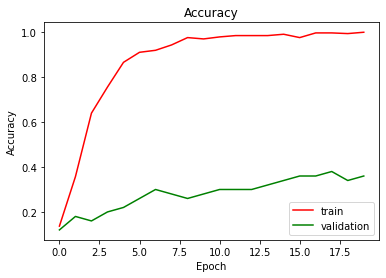

In [ ]:
plt.plot(model_ResNet1.history['accuracy'],c='red')
plt.plot(model_ResNet1.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

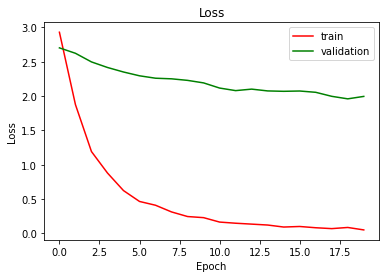

In [ ]:
plt.plot(model_ResNet1.history['loss'],c='red')
plt.plot(model_ResNet1.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

2/2 [==============================] - 4s 539ms/step
              precision    recall  f1-score   support

         0.0       0.50      0.25      0.33         4
         1.0       0.29      0.29      0.29         7
         2.0       0.29      0.33      0.31         6
         3.0       0.15      0.50      0.24         4
         4.0       0.00      0.00      0.00        13
         5.0       0.17      0.50      0.25         4
         6.0       0.25      0.12      0.17         8
         7.0       0.33      0.40      0.36         5
         8.0       0.80      0.57      0.67         7
         9.0       0.50      0.50      0.50         6

    accuracy                           0.30        64
   macro avg       0.33      0.35      0.31        64
weighted avg       0.30      0.30      0.28        64



<AxesSubplot:>

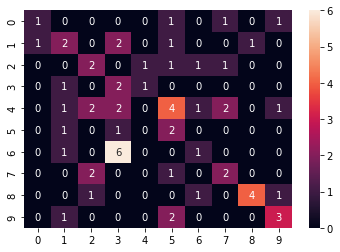

In [ ]:
y_test_prob = model_ResNet.predict(x_test)
ypredict_ResNet = y_test_prob.argmax(axis=-1)
print(classification_report(y_test,ypredict_ResNet))
sns.heatmap(confusion_matrix(y_test, ypredict_ResNet) ,annot=True)